# Airline Passenger Satisfaction

<img src="https://miro.medium.com/max/1400/1*on8xOgX50TFWUG6WCyvFFA.png" width="800" />

# Introduction (problem or your goal)

# Dataset Overview and Source

US Airline passenger satisfaction survey dataset.

# Data Collection

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score



In [2]:
# df.to_csv('Airline_Passenger_Satisfaction.csv')
# df1x =  pd.read_excel('satisfaction.xlsx')
# df2x = pd.read_excel('satisfaction_2015.xlsx')
# dfx = pd.concat([df1x, df2x], axis=0, ignore_index=True)
# dfx.to_csv('Airline_Passenger_Satisfaction_Original.csv')

# Data Preparation

In [3]:
df = pd.read_csv("Airline_Passenger_Satisfaction_Original.csv", index_col=0)
df.head()

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight service
0,11112,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,...,3,3,0,3,5,3,2,0,0.0,NaN
1,110278,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,...,3,4,4,4,2,3,2,310,305.0,NaN
2,103199,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,...,2,3,3,4,4,4,2,0,0.0,NaN
3,47462,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,...,1,1,0,1,4,1,3,0,0.0,NaN
4,120011,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,...,2,2,0,2,4,2,5,0,0.0,NaN


In [4]:
df.shape

(259760, 25)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 259760 entries, 0 to 259759
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 259760 non-null  int64  
 1   satisfaction_v2                    259760 non-null  object 
 2   Gender                             259760 non-null  object 
 3   Customer Type                      259760 non-null  object 
 4   Age                                259760 non-null  int64  
 5   Type of Travel                     259760 non-null  object 
 6   Class                              259760 non-null  object 
 7   Flight Distance                    259760 non-null  int64  
 8   Seat comfort                       259760 non-null  int64  
 9   Departure/Arrival time convenient  259760 non-null  int64  
 10  Food and drink                     259760 non-null  int64  
 11  Gate location                      2597

In [6]:
df.isnull().sum()

id                                        0
satisfaction_v2                           0
Gender                                    0
Customer Type                             0
Age                                       0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Seat comfort                              0
Departure/Arrival time convenient         0
Food and drink                            0
Gate location                             0
Inflight wifi service                     0
Inflight entertainment                    0
Online support                       129880
Ease of Online booking                    0
On-board service                          0
Leg room service                          0
Baggage handling                          0
Checkin service                           0
Cleanliness                               0
Online boarding                           0
Departure Delay in Minutes      

In [7]:
df = df.drop(columns=['Inflight service','Online support'])
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(0)

In [8]:
df.isnull().sum().sum()

0

In [9]:
df.describe()

,id,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,259760.000000,259760.000000,259760.000000,259760.000000,259760.000000,259760.000000,259760.000000,259760.000000,259760.000000,259760.000000,259760.000000,259760.000000,259760.000000,259760.000000,259760.000000,259760.000000,259760.000000,259760.000000
mean,64940.500000,39.427957,1585.862723,3.139979,3.024122,3.028384,2.983673,2.988913,3.370777,3.114490,3.424049,3.418390,3.663894,3.323537,3.496043,3.302610,14.713713,15.045465
std,37493.198649,15.119331,1086.918816,1.389708,1.527347,1.399158,1.292333,1.349414,1.340125,1.400915,1.279649,1.306038,1.168743,1.263503,1.253055,1.325911,38.071053,38.416279
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32470.750000,27.000000,606.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64940.500000,40.000000,1510.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97410.250000,51.000000,2297.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [10]:
df.describe(include=['O'])

,satisfaction_v2,Gender,Customer Type,Type of Travel,Class
count,259760,259760,259760,259760,259760
unique,2,2,2,2,3
top,neutral or dissatisfied,Female,Loyal Customer,Business travel,Business
freq,132245,131798,212200,179386,124320


In [11]:
sum(df.duplicated())

2

In [12]:
df.drop_duplicates(inplace=True)
sum(df.duplicated())

0

# Preprocessing and EDA

In [13]:
from sklearn import preprocessing
# select all categorical variables
df_categorical = df.select_dtypes(include=['object'])
df_categorical.head()

,satisfaction_v2,Gender,Customer Type,Type of Travel,Class
0,satisfied,Female,Loyal Customer,Personal Travel,Eco
1,satisfied,Male,Loyal Customer,Personal Travel,Business
2,satisfied,Female,Loyal Customer,Personal Travel,Eco
3,satisfied,Female,Loyal Customer,Personal Travel,Eco
4,satisfied,Female,Loyal Customer,Personal Travel,Eco


In [14]:
# apply Label encoder to df_categorical
le = preprocessing.LabelEncoder()
df_categorical = df_categorical.apply(le.fit_transform)
df_categorical.head()

,satisfaction_v2,Gender,Customer Type,Type of Travel,Class
0,1,0,0,1,1
1,1,1,0,1,0
2,1,0,0,1,1
3,1,0,0,1,1
4,1,0,0,1,1


In [15]:
# concat df_categorical with original df
df = df.drop(df_categorical.columns, axis=1)
df = pd.concat([df, df_categorical], axis=1)
df.head()

,id,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Ease of Online booking,...,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction_v2,Gender,Customer Type,Type of Travel,Class
0,11112,65,265,0,0,0,2,2,4,3,...,5,3,2,0,0.0,1,0,0,1,1
1,110278,47,2464,0,0,0,3,0,2,3,...,2,3,2,310,305.0,1,1,0,1,0
2,103199,15,2138,0,0,0,3,2,0,2,...,4,4,2,0,0.0,1,0,0,1,1
3,47462,60,623,0,0,0,3,3,4,1,...,4,1,3,0,0.0,1,0,0,1,1
4,120011,70,354,0,0,0,3,4,3,2,...,4,2,5,0,0.0,1,0,0,1,1


In [16]:
df = df.drop(columns='id', axis=1)
df = df.rename({'satisfaction_v2': 'Satisfaction'}, axis=1)

In [17]:
y = df['Satisfaction']
df = df.drop(columns='Satisfaction', axis=1)
df['Satisfaction'] = y

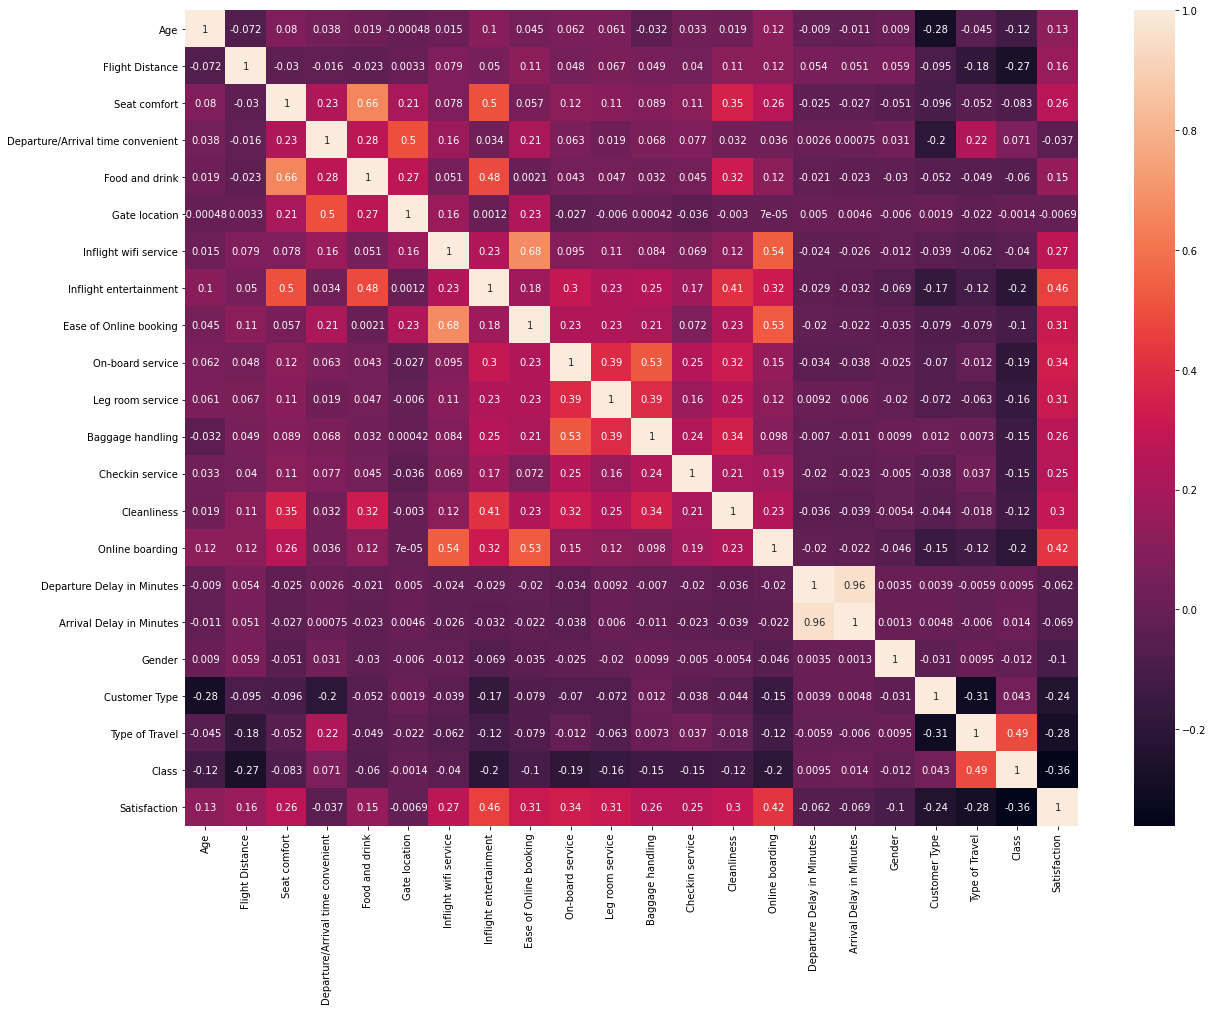

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (20,15))
sns.heatmap(df.corr(), annot=True);

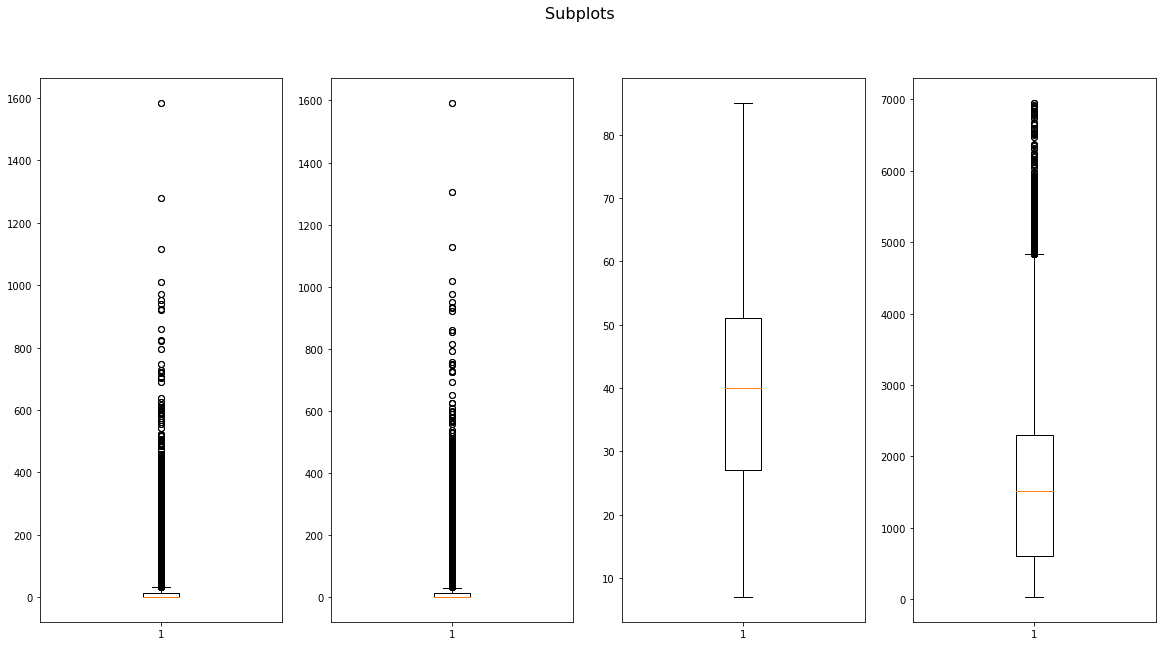

In [19]:
plt.figure(figsize=[20,10])
plt.suptitle('Subplots',fontsize = 16)

plt.subplot(1,4,1)
plt.boxplot(df['Arrival Delay in Minutes']);

plt.subplot(1,4,2)
plt.boxplot(df['Departure Delay in Minutes']);

plt.subplot(1,4,3)
plt.boxplot(df['Age']);

plt.subplot(1,4,4)
plt.boxplot(df['Flight Distance']);

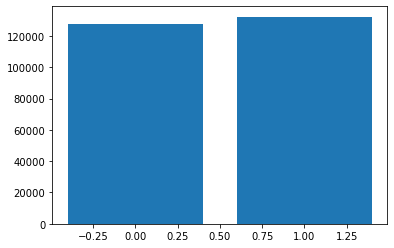

In [20]:
plt.bar(df['Satisfaction'].unique(), df['Satisfaction'].value_counts());

In [18]:
df.head()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Ease of Online booking,On-board service,...,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Gender,Customer Type,Type of Travel,Class,Satisfaction
0,65,265,0,0,0,2,2,4,3,3,...,5,3,2,0,0.0,0,0,1,1,1
1,47,2464,0,0,0,3,0,2,3,4,...,2,3,2,310,305.0,1,0,1,0,1
2,15,2138,0,0,0,3,2,0,2,3,...,4,4,2,0,0.0,0,0,1,1,1
3,60,623,0,0,0,3,3,4,1,1,...,4,1,3,0,0.0,0,0,1,1,1
4,70,354,0,0,0,3,4,3,2,2,...,4,2,5,0,0.0,0,0,1,1,1


## Normalizing Flight Distance

# ML

## train test split

In [23]:
# X = df.iloc[:,:-1]
X=df.drop(['Arrival Delay in Minutes','Departure Delay in Minutes'], axis=1)
y = df['Satisfaction']
X

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Gender,Customer Type,Type of Travel,Class,Satisfaction
0,65,265,0,0,0,2,2,4,3,3,0,3,5,3,2,0,0,1,1,1
1,47,2464,0,0,0,3,0,2,3,4,4,4,2,3,2,1,0,1,0,1
2,15,2138,0,0,0,3,2,0,2,3,3,4,4,4,2,0,0,1,1,1
3,60,623,0,0,0,3,3,4,1,1,0,1,4,1,3,0,0,1,1,1
4,70,354,0,0,0,3,4,3,2,2,0,2,4,2,5,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259755,35,2592,4,5,4,5,5,5,5,5,5,5,5,4,2,0,0,0,0,1
259756,11,610,5,1,5,1,5,5,1,5,4,1,2,5,5,0,0,0,1,1
259757,46,86,5,1,5,1,1,5,1,1,3,1,5,2,5,1,0,0,0,1
259758,35,83,5,1,5,1,1,5,1,4,4,2,5,5,5,0,0,0,0,1


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [69]:
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [70]:
# normalizerx = preprocessing.Normalizer().fit(X_train)
# normalizery = preprocessing.Normalizer().fit(X_test)


In [71]:
# xtrainNormalozed = normalizerx.transform(X_train)
# xtestNormalized= normalizery.transform(X_test)

## Logistic Regression

In [72]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0)
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)


In [73]:
lr_acc= accuracy_score(y_test,lr_pred)
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     39749
           1       0.97      0.97      0.97     38179

    accuracy                           0.97     77928
   macro avg       0.97      0.97      0.97     77928
weighted avg       0.97      0.97      0.97     77928



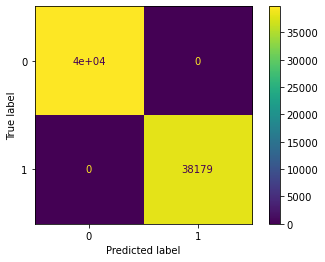

In [56]:
plot_confusion_matrix(lr, X_test, y_test)  
plt.show()

## SVM

In [ ]:
from sklearn.svm import SVC

svc=SVC() 
svc.fit(X_train,y_train)
svm_pred=svc.predict(X_test)


In [ ]:
svm_acc=accuracy_score(y_test,y_pred)
print(classification_report(y_test, svm_pred))

In [ ]:
plot_confusion_matrix(svc, X_test, y_test)  
plt.show()

In [29]:
# from sklearn.preprocessing import Normalizer

# classifier = LogisticRegression(random_state=0)
# classifier.fit(xtrainNormalozed,y_train)
# predictions = classifier.predict(xtestNormalized)
# print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.72      0.59      0.65     39749
           1       0.64      0.76      0.69     38179

    accuracy                           0.67     77928
   macro avg       0.68      0.67      0.67     77928
weighted avg       0.68      0.67      0.67     77928



## Naive bayes

In [74]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,y_train)

nb_pred=nb.predict(X_test)

In [75]:
nb_acc=accuracy_score(y_test,nb_pred)
print(classification_report(y_test, nb_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39749
           1       1.00      1.00      1.00     38179

    accuracy                           1.00     77928
   macro avg       1.00      1.00      1.00     77928
weighted avg       1.00      1.00      1.00     77928



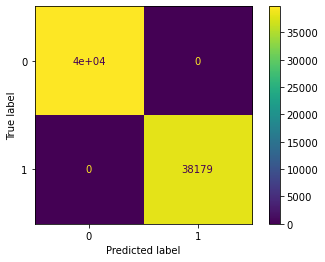

In [59]:
plot_confusion_matrix(nb, X_test, y_test)  
plt.show()

## Random Forest Classifier

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
rfc = RandomForestClassifier(n_estimators=100) #n_estimators: The number of trees in the forest.
cv_dict = cross_validate(rfc, X, y, return_train_score=True)

rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

In [26]:
cv_dict

{'fit_time': array([17.65360403, 17.50161314, 18.0825007 , 19.44964862, 18.66898751]),
 'score_time': array([0.73233414, 0.69440699, 0.72471261, 0.73726821, 0.68316841]),
 'test_score': array([1., 1., 1., 1., 1.]),
 'train_score': array([1., 1., 1., 1., 1.])}

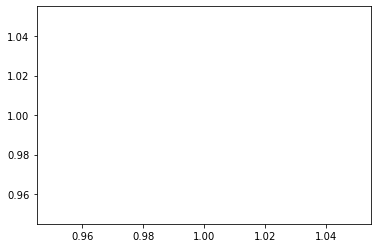

In [27]:
plt.plot(cv_dict['test_score'],cv_dict['train_score'])

In [77]:
rfc_acc=accuracy_score(y_test,rfc_pred)
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39749
           1       1.00      1.00      1.00     38179

    accuracy                           1.00     77928
   macro avg       1.00      1.00      1.00     77928
weighted avg       1.00      1.00      1.00     77928



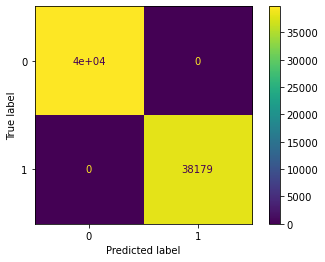

In [78]:
plot_confusion_matrix(rfc, X_test, y_test)  
plt.show()

## Decision Tree Classifier

In [79]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
dtree_pred = dtree.predict(X_test)

In [80]:
dtree_acc=accuracy_score(y_test,dtree_pred)
print(classification_report(y_test, dtree_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39749
           1       1.00      1.00      1.00     38179

    accuracy                           1.00     77928
   macro avg       1.00      1.00      1.00     77928
weighted avg       1.00      1.00      1.00     77928



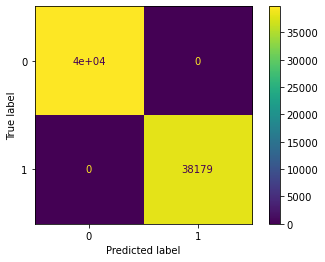

In [81]:
plot_confusion_matrix(dtree, X_test, y_test)  
plt.show()

## Comparing accuracy scores

<BarContainer object of 4 artists>

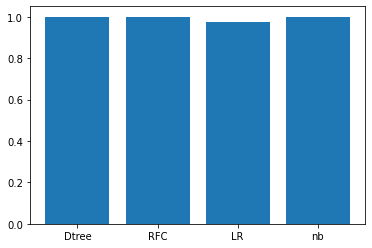

In [82]:
plt.bar(['Dtree','RFC','LR','nb'],[dtree_acc,rfc_acc,lr_acc,nb_acc])